# Diamonds Price Prediction

#### Problem Statement: Use Regression Analysis to Analyzed and estimate Diamond prices. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\MAHIMA\\OneDrive\\Desktop\\")
diamonds = pd.read_csv("diamonds.csv")
diamonds

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

Here x, y and z are the dimensions of the diamonds.

## EDA and Data Preprocessing

In [3]:
diamonds.shape

(53940, 11)

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
print(diamonds.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [6]:
diamonds.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

Min values of x, y and z are zero, which makes the diamond 1D or 2D which is not possible.
Since we have a large dataset, we can afford to remove these observations.

In [7]:
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)

In [8]:
diamonds.shape

(53920, 11)

In [9]:
#Removing the index column
diamonds = diamonds.drop(["Unnamed: 0"], axis=1)

In [10]:
diamonds.shape

(53920, 10)

### Checking for and treating Outliers

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


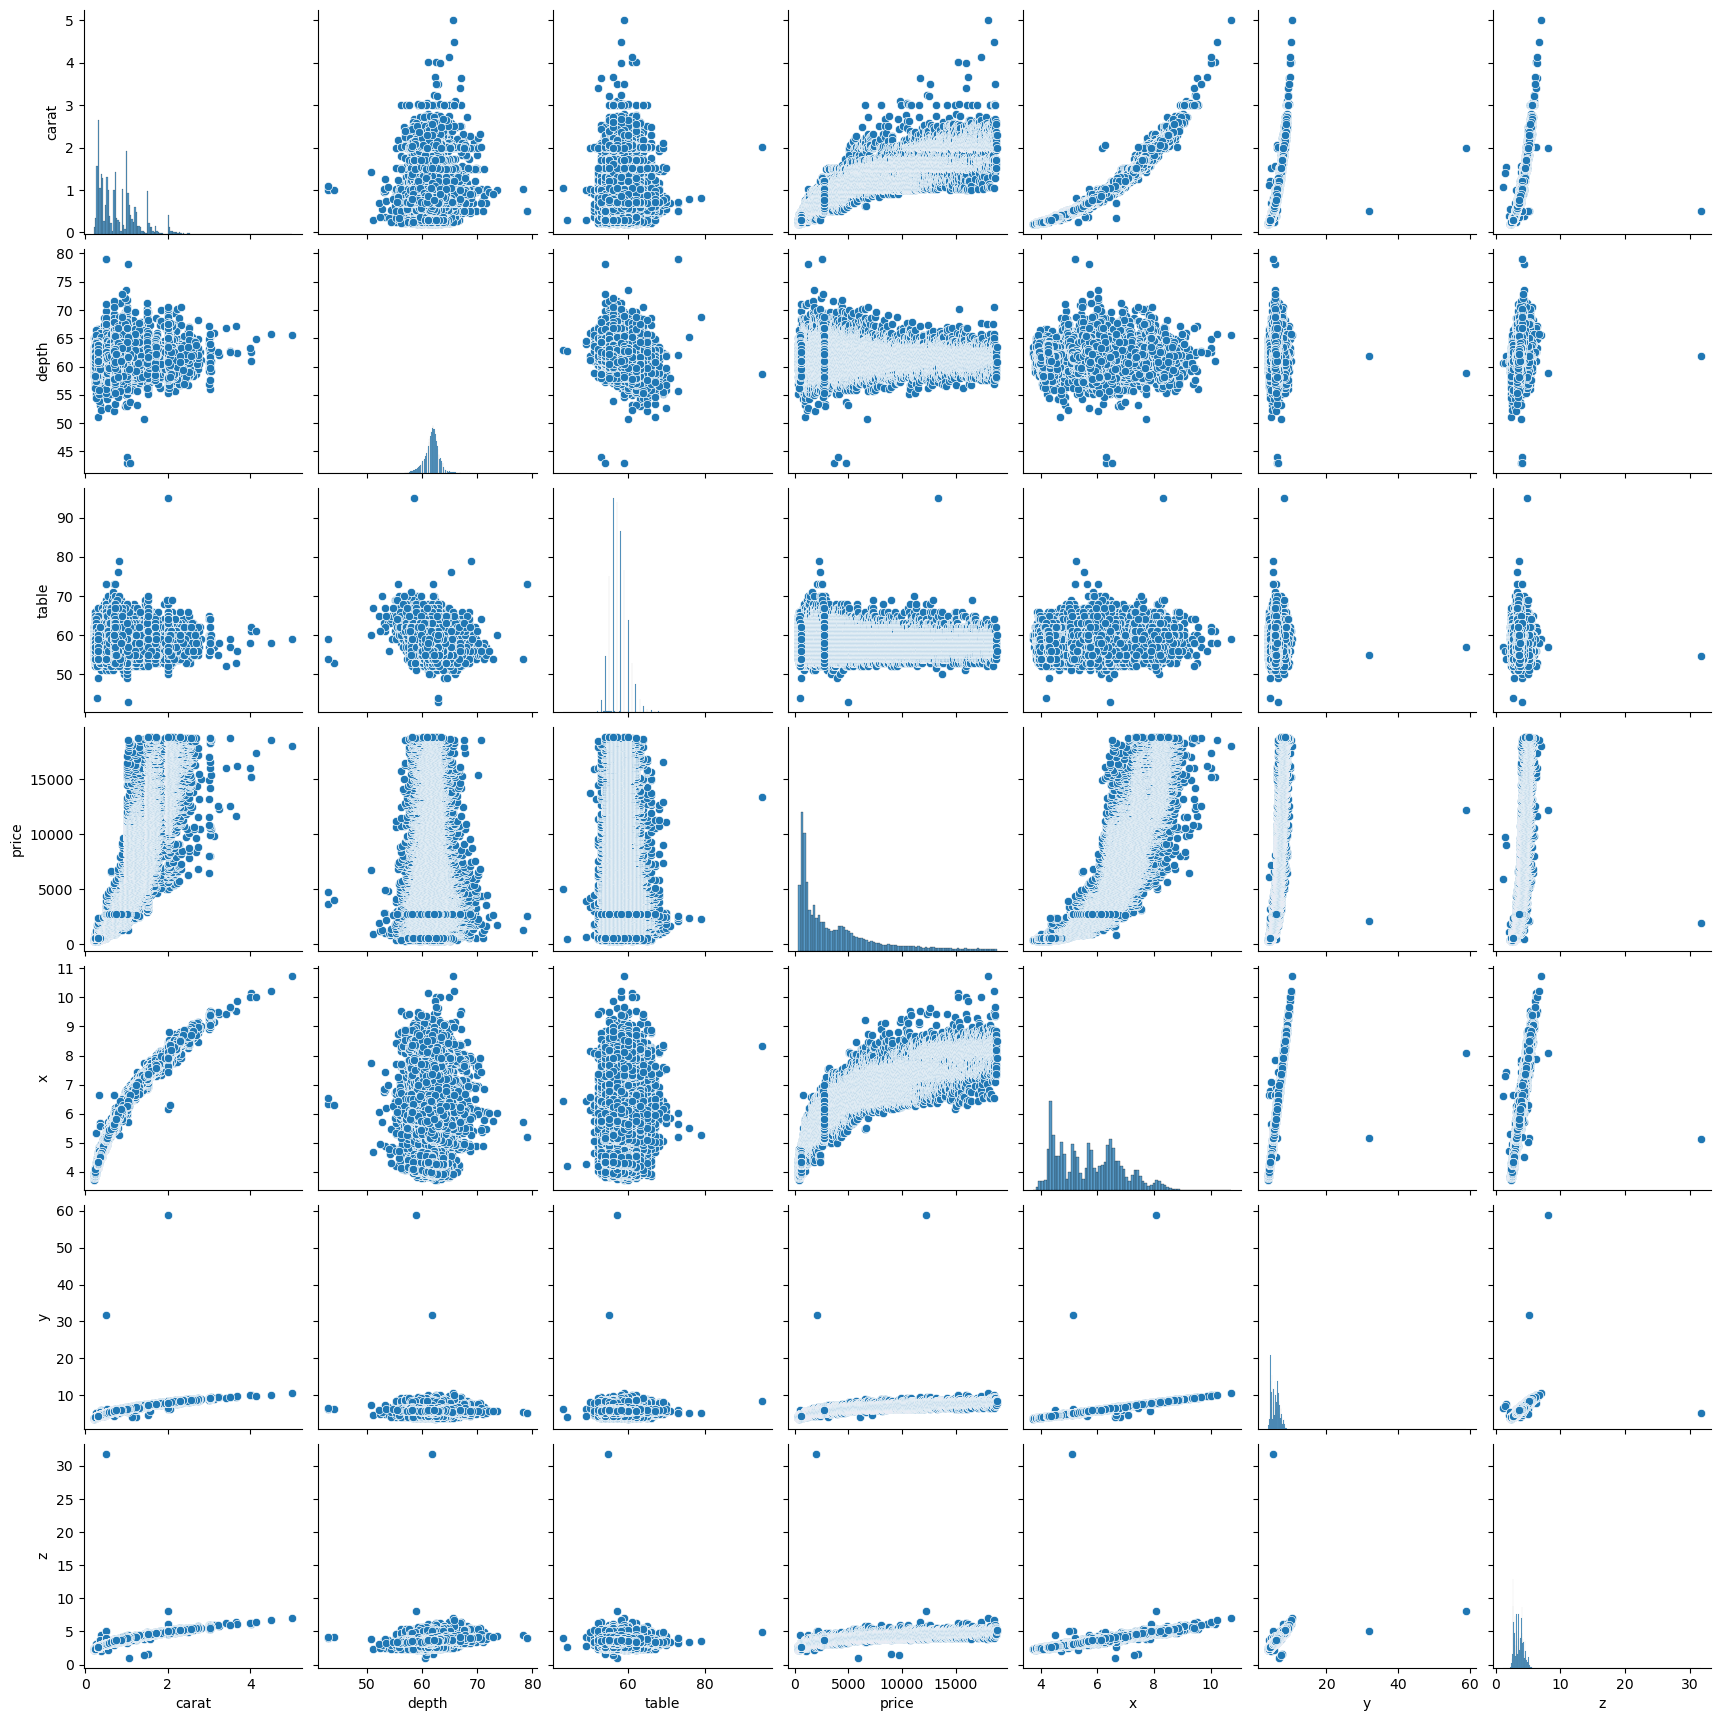

In [11]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(diamonds)
plt.show()

In [12]:
#Removing outliers from 'Carat', x, y and z
for feature in ['carat', 'x', 'y', 'z']:
    Q1 = diamonds[feature].quantile(0.25)
    Q3 = diamonds[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    diamonds = diamonds[(diamonds[feature] >= lower_bound) & (diamonds[feature] <= upper_bound)]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


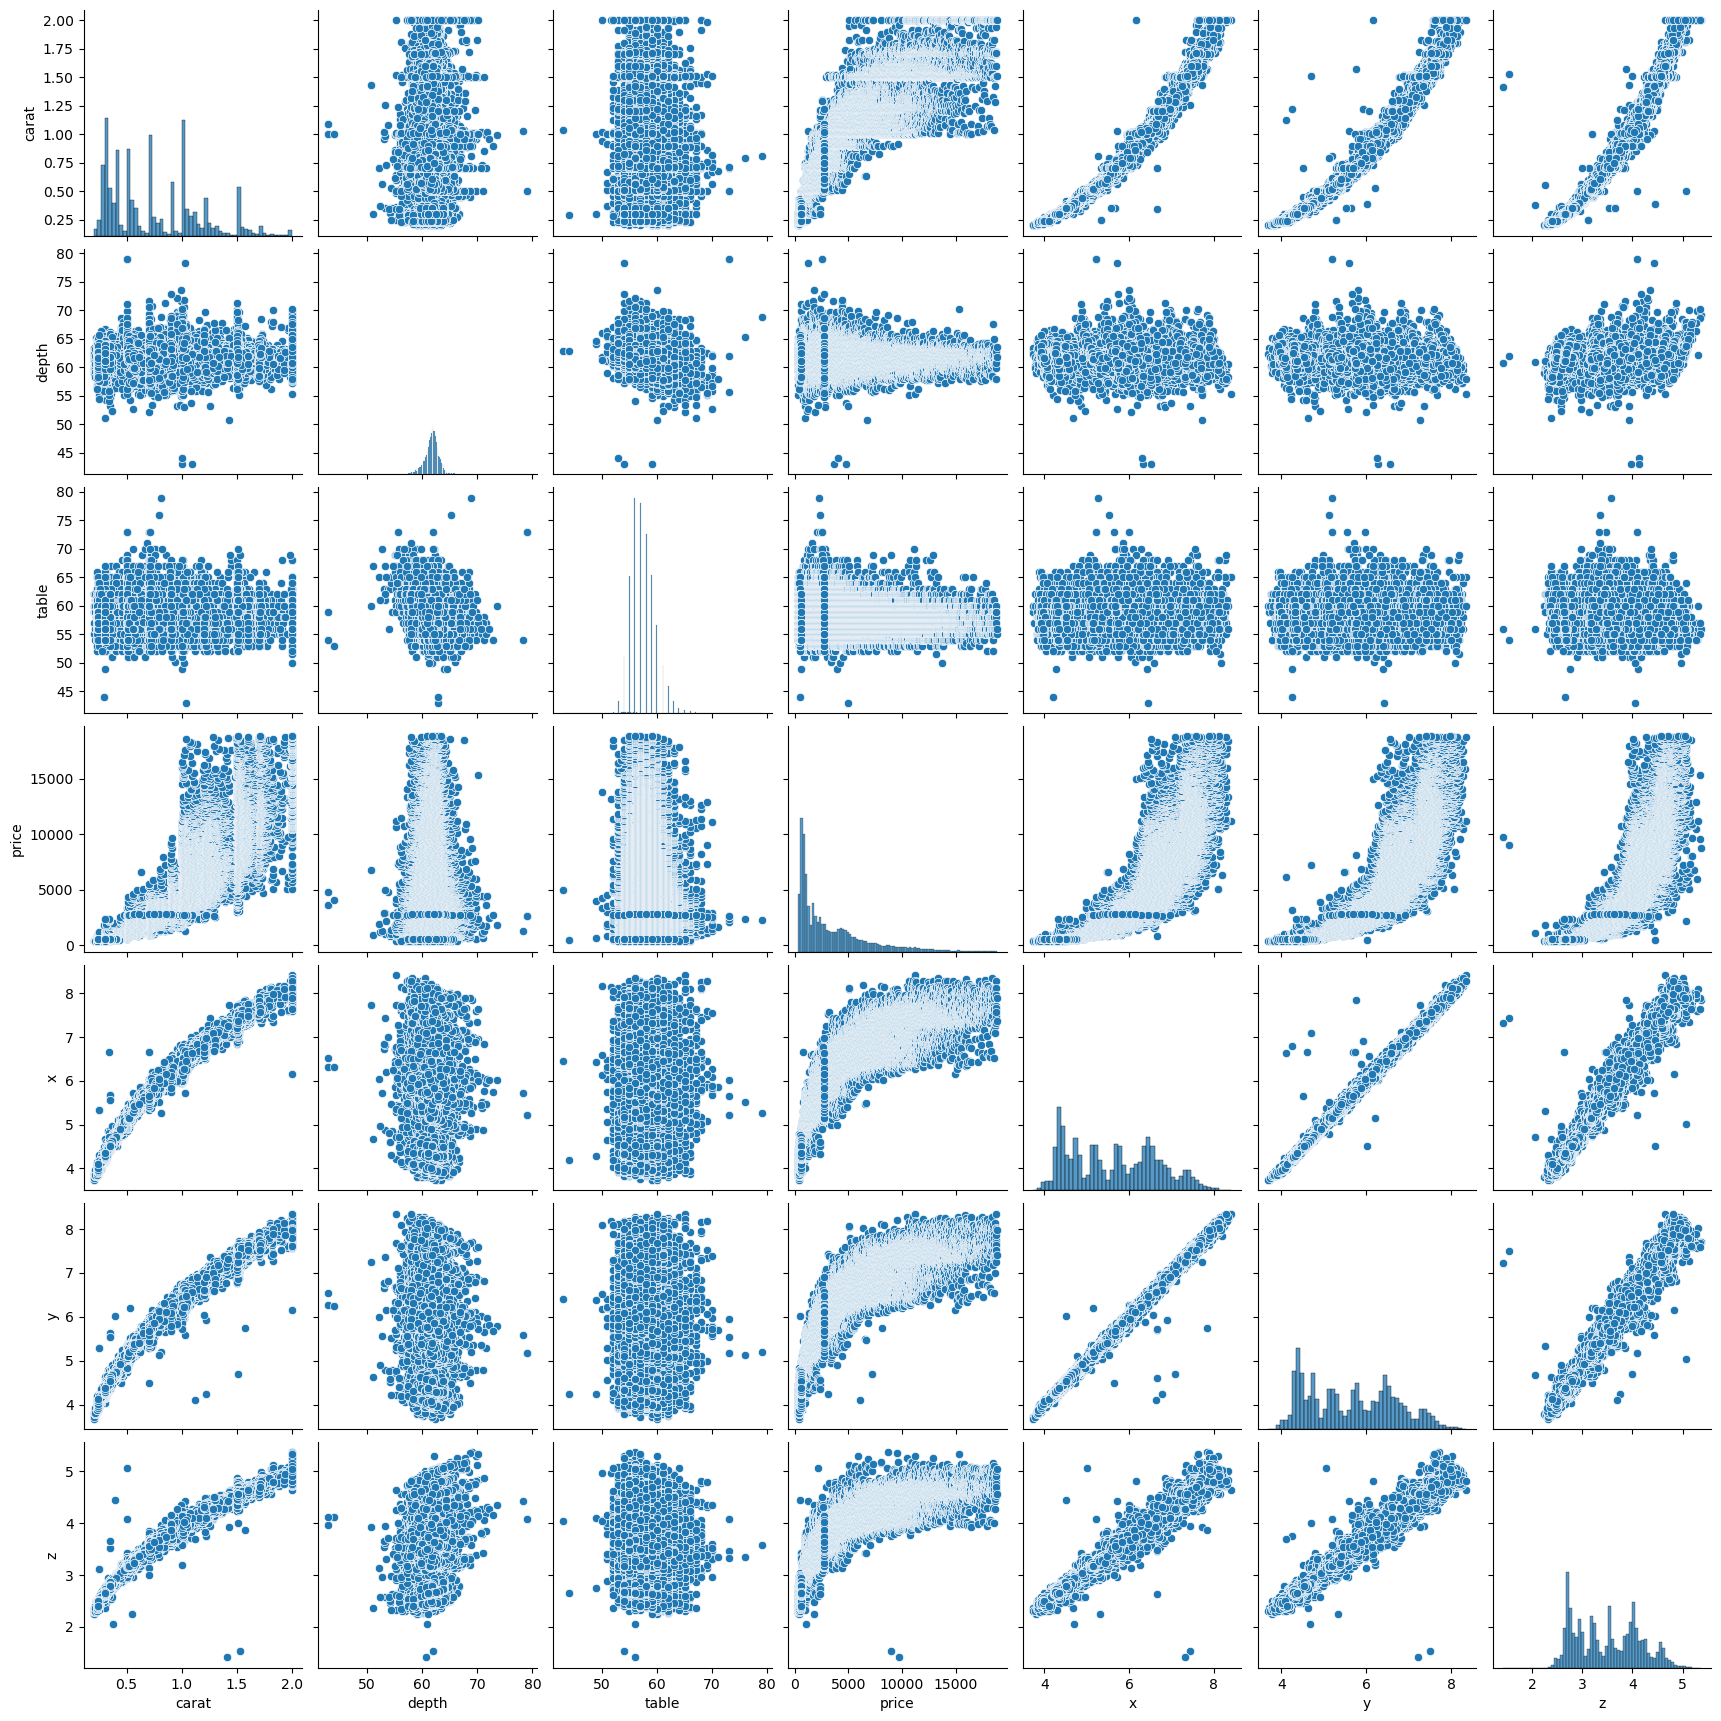

In [13]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(diamonds)
plt.show()

Text(0, 0.5, 'table')

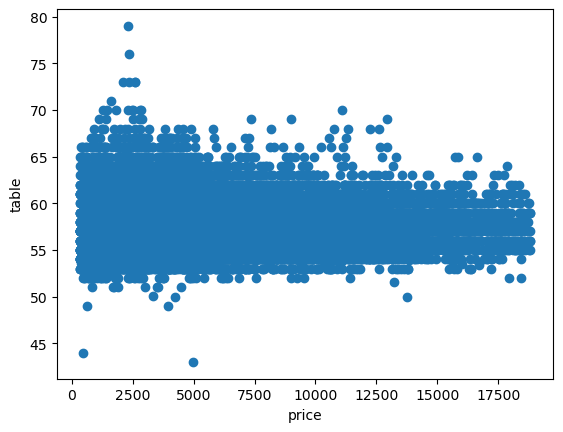

In [14]:
#Depth and table also need to be capped.
plt.scatter(diamonds['price'], diamonds['table'])
plt.xlabel ('price')
plt.ylabel ('table')

Text(0, 0.5, 'depth')

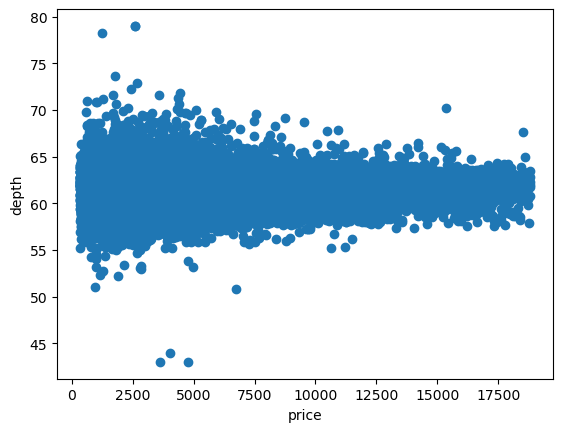

In [15]:
plt.scatter(diamonds['price'], diamonds['depth'])
plt.xlabel ('price')
plt.ylabel ('depth')

In [16]:
#removing outliers from depth and table
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]

Text(0, 0.5, 'table')

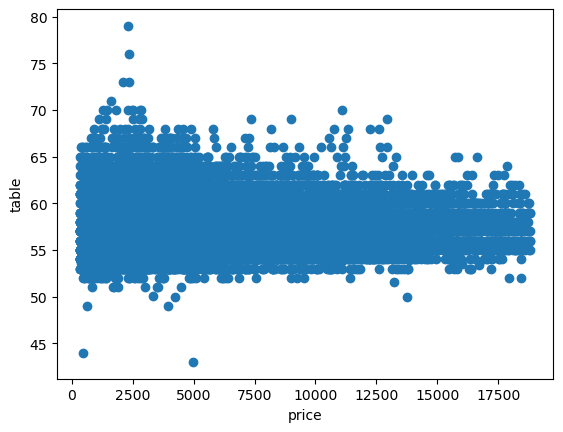

In [17]:
plt.scatter(diamonds['price'], diamonds['table'])
plt.xlabel ('price')
plt.ylabel ('table')

Text(0, 0.5, 'depth')

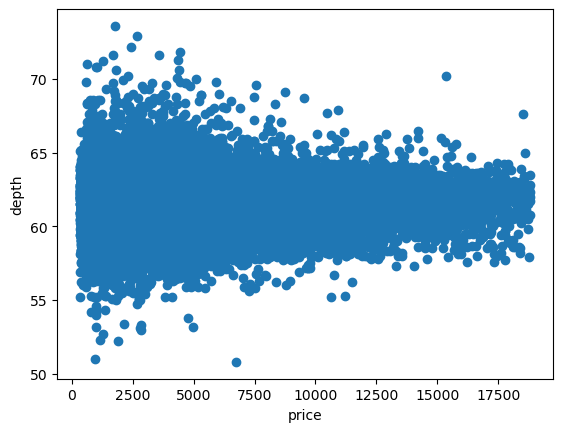

In [18]:
plt.scatter(diamonds['price'], diamonds['depth'])
plt.xlabel ('price')
plt.ylabel ('depth')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


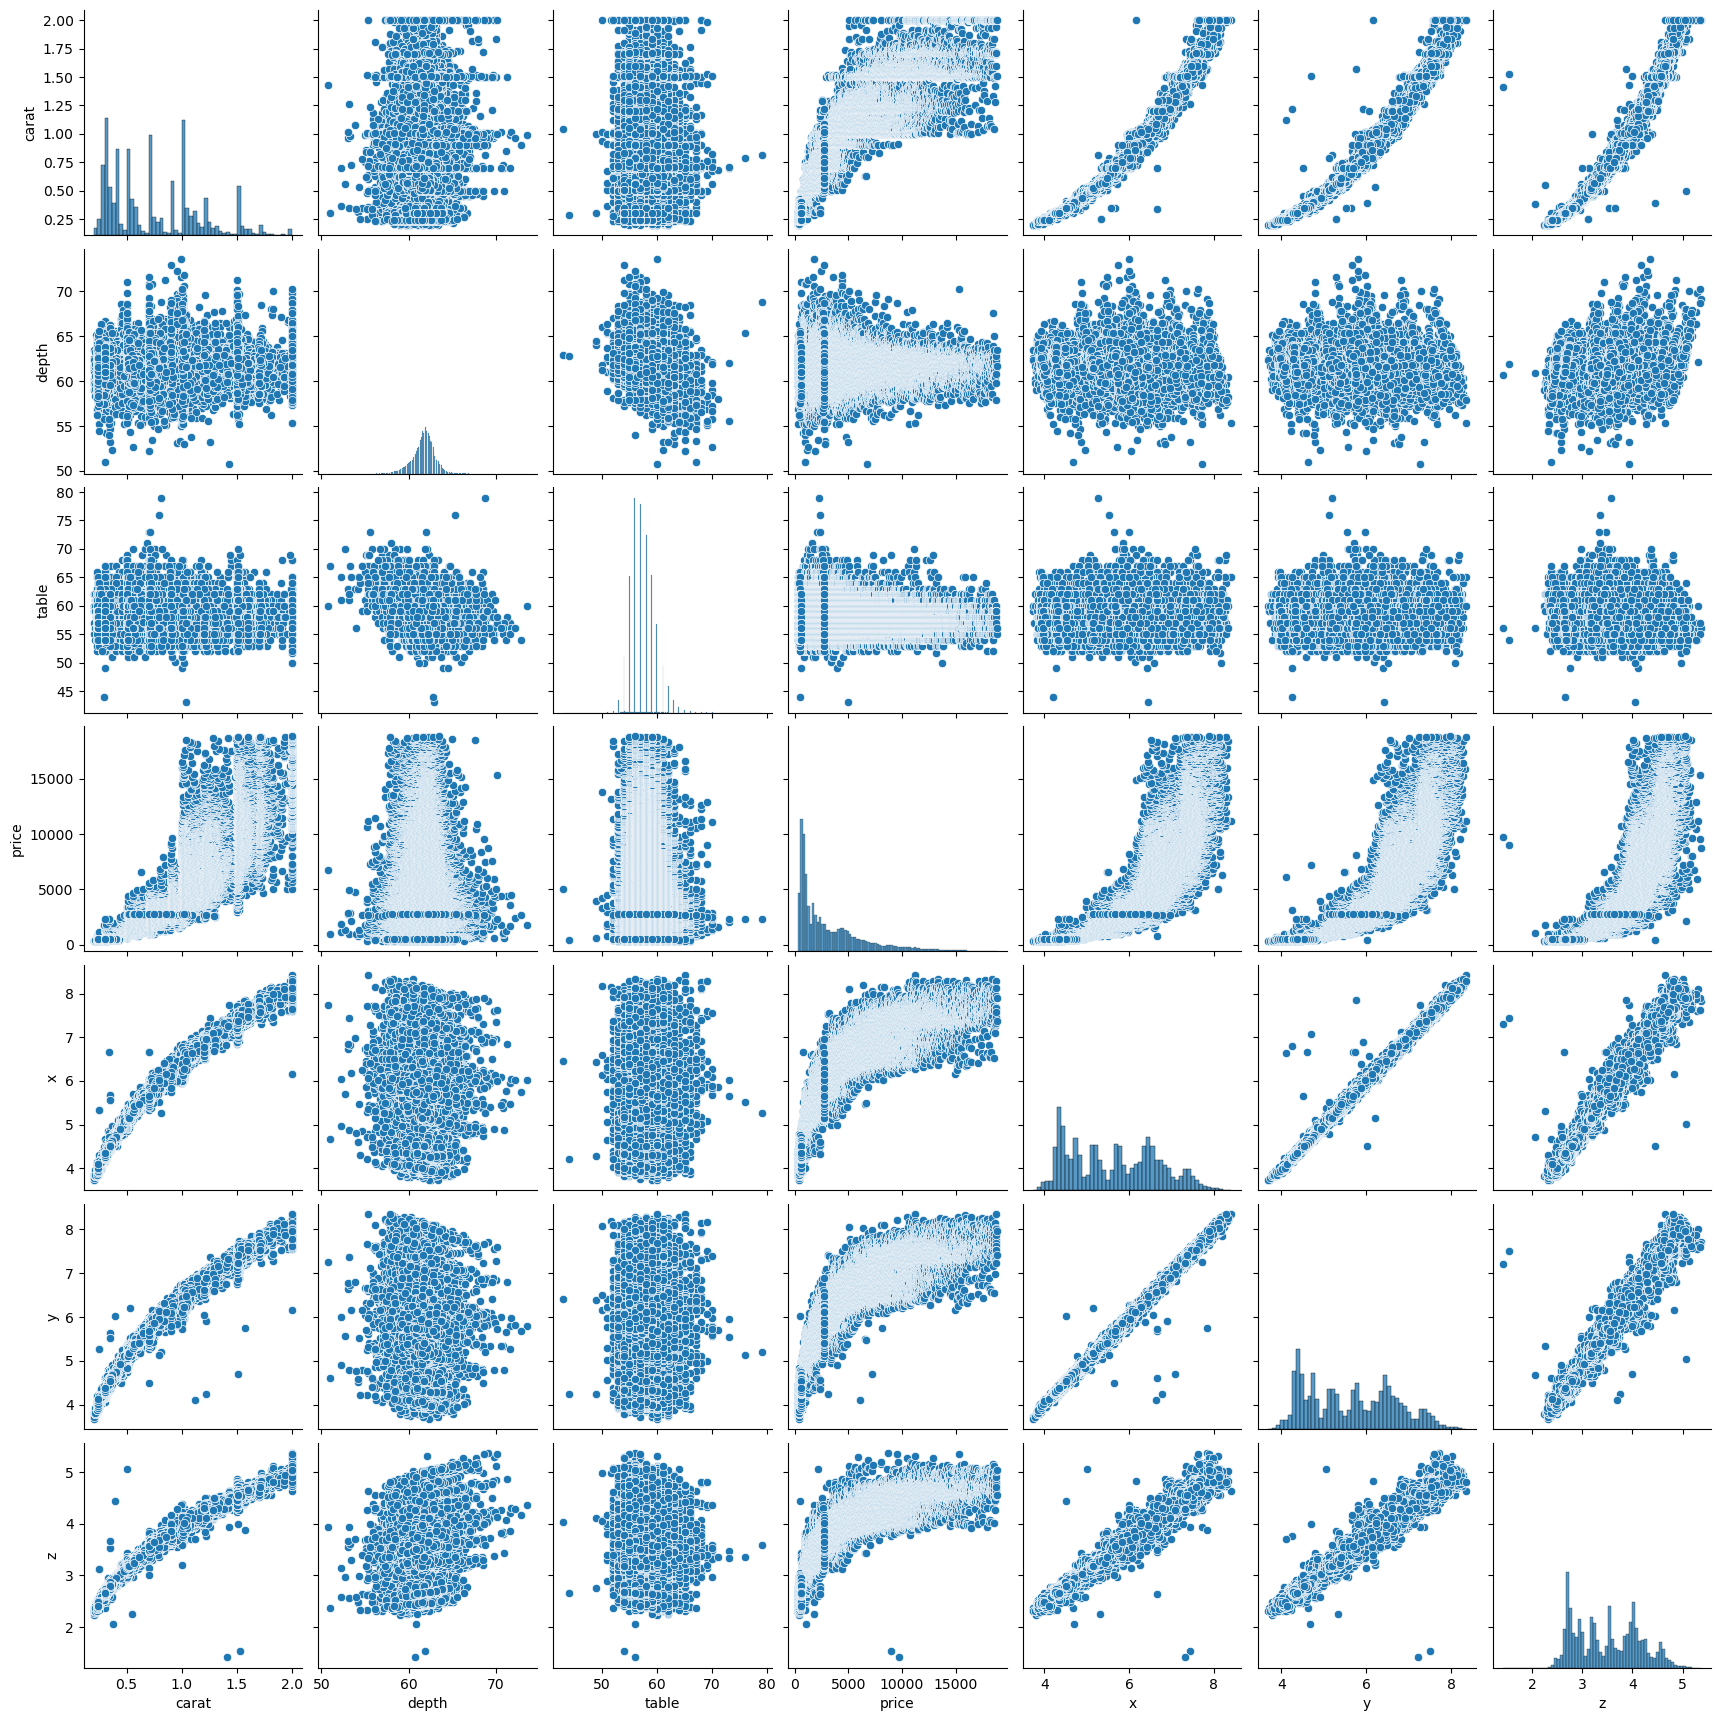

In [19]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(diamonds)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in ['cut', 'color', 'clarity']:
    diamonds[col] = label_encoder.fit_transform(diamonds[col])

diamonds.head()


carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

## Model Creation

In [21]:
X = diamonds.drop('price', axis=1)
y = diamonds.iloc[:,6].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

print ('X Shape-',X.shape)
print ('Y Shape-',y.shape)
print ('X_Train Shape-',X_train.shape)
print ('Y_Train Shape-',y_train.shape)
print ('X_Test Shape-',X_test.shape)
print ('Y_Test Shape-',y_test.shape)

X Shape- (52027, 9)
Y Shape- (52027,)
X_Train Shape- (41621, 9)
Y_Train Shape- (41621,)
X_Test Shape- (10406, 9)
Y_Test Shape- (10406,)


### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print (model)

LinearRegression()


In [23]:
y_pred= model.predict(X_test)
print(y_pred)

[ -572.13180934  6318.47451504  9785.79130133 ...  7199.1765121
  9656.31613059 12538.14928219]


In [24]:
#Display the Prediction with Difference 

result = pd.concat([pd.DataFrame(y_pred, columns = ['Prediction']),
                    pd.DataFrame(y_test,columns = ['Y_Test'])], axis =1)
result['Difference']= y_test -y_pred
result


Prediction  Y_Test   Difference
0       -572.131809     536  1108.131809
1       6318.474515    6078  -240.474515
2       9785.791301   11128  1342.208699
3       6166.739712    7255  1088.260288
4       1077.732645     970  -107.732645
...             ...     ...          ...
10401   3925.847367    4424   498.152633
10402    406.467378    1240   833.532622
10403   7199.176512    5100 -2099.176512
10404   9656.316131   15247  5590.683869
10405  12538.149282   10754 -1784.149282

[10406 rows x 3 columns]

In [25]:
 
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.8772


### Regression Trees

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='squared_error') 
dtr.fit(X_train, y_train)
print(dtr)

DecisionTreeRegressor()


In [27]:
y_pred = dtr.predict(X_test)
print(y_pred)

[  504.  6565. 11554. ...  5916. 15802. 10847.]


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.9674


### KNN

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
y_pred = knn_reg.predict(X_test)
print(y_pred)

[  521.6  6378.   5068.2 ...  6266.  14881.  10774. ]


In [31]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.9404


## Conclusion:

- Linear Regression Accuracy: 87.72%
- KNN Accuracy: 94.04%
- Regression Tree Accuracy: 96.74%

Therefore, Regression Tree gives the best predictions for Diamind Prices.